# PRML Assigment 7
## Bike sharing

In [1]:
# import the libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
# loading data
data = pd.read_csv(r"C:\Users\Deena\Downloads\bike+sharing+dataset\hour.csv")

In [3]:
# reading data
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<AxesSubplot:>

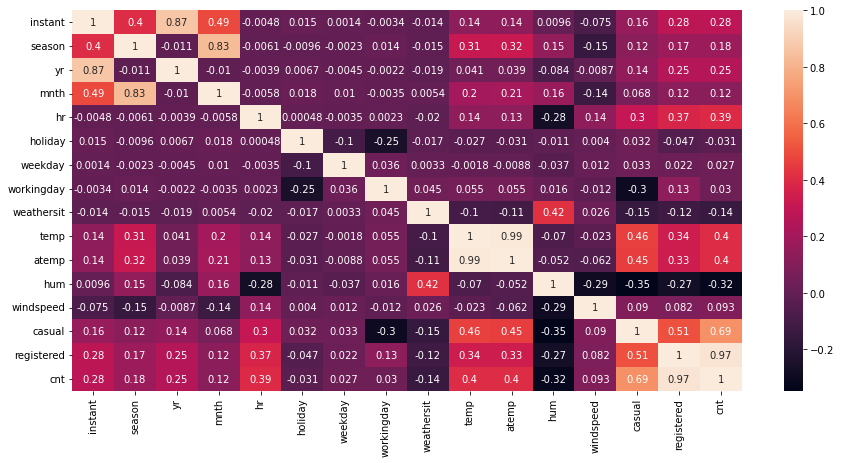

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)

## Exercise 1 - Is there a correlation between temp/atemp and the total count of rental bikes?
### Yes, from the below calculations, there is a positive correlation of 0.4047722757786519 between 'temp' and 'cnt' and 0.40092930412661515 between 'atemp' and 'cnt'.

In [8]:
df1 = data[['temp', 'atemp', 'cnt']].copy()

In [9]:
df1.dtypes

temp     float64
atemp    float64
cnt        int64
dtype: object

In [10]:
N = float(len(df1))
N

17379.0

In [11]:
# for correlation between two data

In [12]:
X1 = df1['temp']
X1

0        0.24
1        0.22
2        0.22
3        0.24
4        0.24
         ... 
17374    0.26
17375    0.26
17376    0.26
17377    0.26
17378    0.26
Name: temp, Length: 17379, dtype: float64

In [13]:
Y = df1['cnt']
Y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [14]:
cov1 = [sum((X1 - X1.mean()) * (Y - Y.mean())) * (1 / (N - 1))]
cov1

[14.137599681697658]

In [15]:
S1 = df1['temp'].std()
S1

0.19255612124972407

In [16]:
S = df1['cnt'].std()
S

181.38759909186527

In [17]:
corr1 = (cov1[0] / (S1 * S))
corr1

0.4047722757786519

In [18]:
# making a function for it
def corr(x, y):
    # first define X and Y
    X = df1[x]
    Y = df1[y]
   
    # find covariance
    cov = [sum((X - X.mean()) * (Y - Y.mean())) * (1 / (N - 1))]
    
    # find standard deviation
    sdX = df1[x].std()
    sdY = df1[y].std()
    
    # find correlation 
    corr = (cov[0] / (sdX * sdY))
    return corr

In [19]:
# 1.1 - correlation between temp and cnt
corr1 = corr('temp','cnt')
corr1

0.4047722757786519

In [20]:
# 1.2 - correlation between atemp and cnt
corr2 = corr('atemp', 'cnt')
corr2

0.40092930412661515

In [21]:
# verifying the results
df1.corr()

,temp,atemp,cnt
temp,1.000000,0.987672,0.404772
atemp,0.987672,1.000000,0.400929
cnt,0.404772,0.400929,1.000000


<AxesSubplot:>

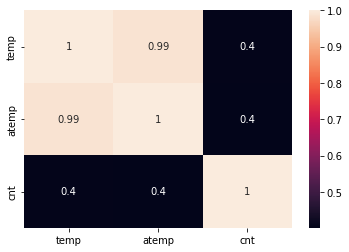

In [22]:
df1.corr()
sns.heatmap(df1.corr(), annot = True)

## Exercise 2 - Can the number of bike rentals be predicted by whether or not it is a holiday and the weather is good?
###  For 'holiday and number of bike rentals' as features, the correlation coefficient is -0.031. In addition to that, the correlation coefficient between 'weather and number of bike rentals' is -0.14.  As observed, both the values are quite close to 0. From this, it can be derived that the number of bike rentals predicted using these two features cannot be termed as good.
## Exercise 3 - Can the number of total bike rentals be predicted by holiday and weather?
### Yes, the number of total bike rentals can be predicted using holiday and weather as independent variable. 
## Exercise 4 - Are weather and holiday good predictors?
### As per the histogram of Y and predicted Y plotted below, it is observed that the accuracy of the predicted is very low as the range of the predicted values(Y_pred) is limited compared to the original values(Y). Hence, it can be concluded that weather and holiday are not good predictors.

In [23]:
df2 = data[['holiday', 'weathersit', 'cnt']].copy()   # 1 - best among them
df3 = df2[df2['holiday'] == 1]

In [24]:
df2['weathersit'].unique()

array([1, 2, 3, 4], dtype=int64)

In [25]:
df2['holiday'].value_counts()   # 0 - non holiday

0    16879
1      500
Name: holiday, dtype: int64

In [26]:
df2.head()

,holiday,weathersit,cnt
0,0,1,16
1,0,1,40
2,0,1,32
3,0,1,13
4,0,1,1


<AxesSubplot:>

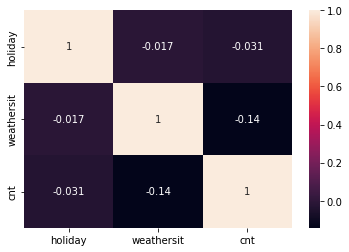

In [27]:
df2.corr()
sns.heatmap(df2.corr(), annot = True)

In [28]:
# X1 - holiday
h1 = df2.iloc[:,0]
h2 = df3.iloc[:,0]

In [29]:
# X2 - weather
w1 = df2.iloc[:,1]
w2 = df3.iloc[:,1]

In [30]:
# c - count of bikes
c1 = df2.iloc[:,2]
c2 = df3.iloc[:,2]

In [31]:
# GRADIENT DESCENT 

def gd(X1, X2, Y):
    t0 = 0   # t0 - theta 0
    t1 = 0   # t1 - theta 1
    t2 = 0   # t2 - theta 2

    A = 0.002      # the learning Rate alpha
    epochs = 1000  # the number of iterations to perform gradient descent

    n = float(len(X1)) # number of elements in X
    print(n)

    # Performing Gradient Descent
    for i in range(epochs):
        Y_pred = t2 * X2 + t1 * X1 + t0            # current predicted value of Y
        D_t2 = (-2/n) * sum(X2 * (Y - Y_pred))     # pd wrt t2
        D_t1 = (-2/n) * sum(X1 * (Y - Y_pred))     # pd wrt t1
        D_t0 = (-2/n) * sum(Y - Y_pred)            # pd wrt t0
        t2 = t2 - A * D_t2                         # update t2
        t1 = t1 - A * D_t1                         # update t1
        t0 = t0 - A * D_t0                         # update t0
    print (t0, t1, t2)
    return t0,t1,t2

In [32]:
m0, m1, m2 = gd(h1, w1, c1)
n0, n1, n2 = gd(h2, w2, c2)

17379.0
126.56287101529387 0.16196397933375936 33.70870748450864
500.0
64.05841441646255 64.05841441646255 17.528422430920596


In [33]:
# plotting the original Y against Y_pred to understand the differnce 
# when all the holiday values are considered
y1 = (m2 * w1) + (m1 * h1) + m0
rmse1 = mean_squared_error(c1, y1, squared=False)
print("RMSE when all holiday values are considered:\n", rmse1)
# when only holiday value 1 is considered
y2 = (n2 * w2) + (n1 * h2) + n0
rmse2 = mean_squared_error(c2, y2, squared=False)
print("RMSE when only value 1 from holiday column is considered:\n", rmse2)

RMSE when all holiday values are considered:
 186.2749543803218
RMSE when only value 1 from holiday column is considered:
 157.8410145369674


In [34]:
X = df2[['holiday', 'weathersit']]
y = df2['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
coef_holiday = model.coef_[0]
coef_weathersit = model.coef_[1]
print("coefficient of holiday: " ,coef_holiday)
print("coefficient of weathersit: " ,coef_weathersit)

coefficient of holiday:  -39.986020650748465
coefficient of weathersit:  -41.42277657605112


261.39770095332847 160.2715784998025


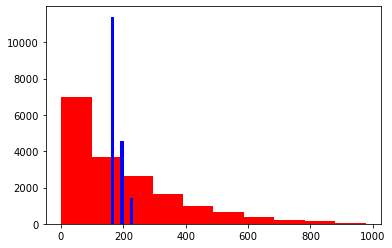

In [35]:
plt.hist(c1, color='red')
plt.hist(y1, color='blue')
print(max(y1), min(y1))

## Exercise - 5 Implement multilinear regression and plot the curve for RMSE and RMSLE. Which curve gives you better information?

In [36]:
# copy the data into another dataframe
df = data.copy()

In [37]:
# dropping the column dteday
df.drop(['dteday'], axis=1, inplace=True)

In [38]:
# finding and arranging correlation coefficient values
df.corr()['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [39]:
data1 = df[['hum', 'weathersit', 'hr','atemp', 'temp', 'casual', 'registered', 'cnt']]
data1

,hum,weathersit,hr,atemp,temp,casual,registered,cnt
0,0.81,1,0,0.2879,0.24,3,13,16
1,0.80,1,1,0.2727,0.22,8,32,40
2,0.80,1,2,0.2727,0.22,5,27,32
3,0.75,1,3,0.2879,0.24,3,10,13
4,0.75,1,4,0.2879,0.24,0,1,1
...,...,...,...,...,...,...,...,...
17374,0.60,2,19,0.2576,0.26,11,108,119
17375,0.60,2,20,0.2576,0.26,8,81,89
17376,0.60,1,21,0.2576,0.26,7,83,90
17377,0.56,1,22,0.2727,0.26,13,48,61


#copy the data
df_mm = data1.copy()
  
#apply normalization techniques
for column in df_mm.columns:
    df_mm[column] = (df_mm[column] - df_mm[column].min()) / (df_mm[column].max() - df_mm[column].min())    

print(df_mm)

In [40]:
X = data1.iloc[:,:-1].values
X 

array([[ 0.81,  1.  ,  0.  , ...,  0.24,  3.  , 13.  ],
       [ 0.8 ,  1.  ,  1.  , ...,  0.22,  8.  , 32.  ],
       [ 0.8 ,  1.  ,  2.  , ...,  0.22,  5.  , 27.  ],
       ...,
       [ 0.6 ,  1.  , 21.  , ...,  0.26,  7.  , 83.  ],
       [ 0.56,  1.  , 22.  , ...,  0.26, 13.  , 48.  ],
       [ 0.65,  1.  , 23.  , ...,  0.26, 12.  , 37.  ]])

In [41]:
# Add a column of ones for the intercept term
#X = np.insert(X, 0, 1, axis=1)
#X

In [42]:
#y = preprocessing.scale(df['cnt'])
Y = data1.iloc[:,-1].values
Y

array([16, 40, 32, ..., 90, 61, 49], dtype=int64)

In [43]:
# Normalize the target variable (y) and features (X) by taking the logarithm
Y = np.log1p(Y)
X = np.log1p(X)
print(X)
print(Y)

[[0.59332685 0.69314718 0.         ... 0.21511138 1.38629436 2.63905733]
 [0.58778666 0.69314718 0.69314718 ... 0.19885086 2.19722458 3.49650756]
 [0.58778666 0.69314718 1.09861229 ... 0.19885086 1.79175947 3.33220451]
 ...
 [0.47000363 0.69314718 3.09104245 ... 0.23111172 2.07944154 4.4308168 ]
 [0.44468582 0.69314718 3.13549422 ... 0.23111172 2.63905733 3.8918203 ]
 [0.50077529 0.69314718 3.17805383 ... 0.23111172 2.56494936 3.63758616]]
[2.83321334 3.71357207 3.49650756 ... 4.51085951 4.12713439 3.91202301]


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (17379, 7)
Shape of Y: (17379,)


In [45]:
# Lists to store RMSE and RMSLE values during training
rmse_values = []
rmsle_values = []

# gradient descent using matrix dot product
A = 0.001
epochs = 1000

n = float(len(Y_train))
print("N:",n)

# t - theta - making a matrix of the dimension [no of columns of X, 1]
t1 = np.zeros(X_train.shape[1])
#t1 = np.random.rand(X_train.shape[1])
print("t1: ",t1.shape)

for i in range(epochs):
    # taking a dot product of the matrices X and t1 and add t0
    Y_pred = np.dot(X_train, t1) #+ t0         
    #print("Y_pred: ",Y_pred.shape)
    
    err = Y_pred - Y_train
    # partial derivative wrt t1
    D_t1 = (2/n) * np.dot(err, X_train)      
    #print("D_t1: ",D_t1.shape)
    
    # updatation of t
    t1 = t1 - A * D_t1                          
   
    # Calculate RMSE and RMSLE and store in lists
    mse = np.square(np.subtract(Y_test, (np.dot(X_test, t1)))).mean() 
    rmse = math.sqrt(mse)
    rmse_values.append(rmse)
    #rmse_values.append(np.sqrt(mean_squared_error(Y_test, np.dot(X_test, t1) ))) 
    msle = np.square((np.log(Y_test + 1) - np.log((np.dot(X_test, t1) + 1)))).mean()
    rmsle = math.sqrt(msle)
    rmsle_values.append(rmsle)
    #rmsle_values.append(np.sqrt(mean_squared_log_error(Y_test, np.dot(X_test, t1)))) 

    
# Print the final coefficients
print("Coefficients:", t1)
print("RMSE: ", rmse_values[-1])
print("RMSLE: ",rmsle_values[1])

N: 12165.0
t1:  (7,)
Coefficients: [0.08890008 0.13666504 0.17948725 0.05275375 0.05345233 0.23723774
 0.75484264]
RMSE:  0.17208985959667025
RMSLE:  1.2015763142805032


In [46]:
# r2 score for gradient descent
y_pred1 = np.dot(X_test, t1)
print("R2 Score when gradient descent is used: ",r2_score(Y_test, y_pred1))

# r2 score using library
model = LinearRegression()
model.fit(X_train, Y_train)
print("R2 score using the library: ",model.score(X_test, Y_test))

R2 Score when gradient descent is used:  0.9852735880726856
R2 score using the library:  0.9965253623797964


In [47]:
# difference between both r2 scores
print("Difference: ", model.score(X_test, Y_test)-r2_score(Y_test, y_pred1))

Difference:  0.011251774307110773


In [48]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Y_test, y_pred1)

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
print("\n")
MSLE = mean_squared_log_error(Y_test, np.dot(X_test, t1))
RMSLE = math.sqrt(MSLE)
print("Root Mean Square Log Error:\n")
print(RMSLE)

Root Mean Square Error:

0.17208985959667025


Root Mean Square Log Error:

0.03958382963909501


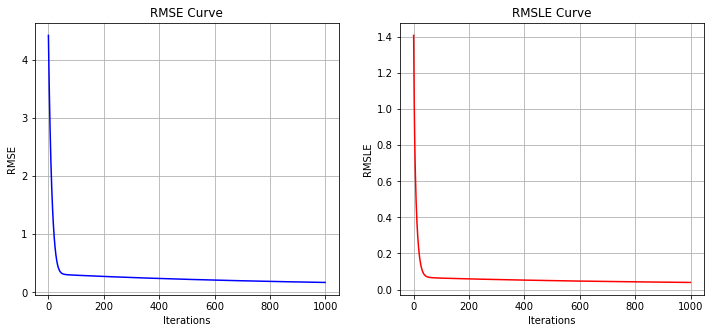

In [49]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), rmse_values, label='RMSE', color='blue')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('RMSE Curve')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), rmsle_values, label='RMSLE', color='red')
plt.xlabel('Iterations')
plt.ylabel('RMSLE')
plt.title('RMSLE Curve')
plt.grid()

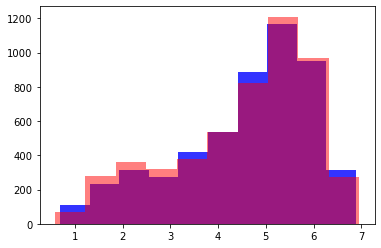

In [50]:
plt.hist(Y_test, color='blue', alpha = 0.8)
plt.hist(y_pred1, color='red', alpha = 0.5)
plt.show()